In [1]:
# All Imports
import cv2
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import requests
from PIL import Image

In [2]:
# Function for getting range for "for" loop with float numbers
def xrange(start, stop, steps):
    return [start + i / (float(steps)/ (stop-start)) for i in range(steps)]

# Function plotting a diagram
def plot_fun(fun, *args, label=None, start=0, stop=0.1, steps=1000):
    plt.plot(*list(zip(*[fun(t, *args) for t in xrange(start, stop, steps)])), label=label)

<p style="page-break-after:always;"></p>

# Task: Fourier Transform
---


## Circle with Eulers Number

<br>
<div style="background-color: #042c58; color: #ffffff; width: 100%; padding: 0.3em; font-size:1.1em; font-weight: bold;">Point on Circle with Eulers Number</div>
<div style="background-color: #d7e9fd; width: 100%; padding-top: 0.5em; padding-bottom: 0.3em">
    
Using the e function we can define a 2d vector as a complex number, where $x$ is the distance traveled on the circumference of the circle.

$$f(\theta) = e^{\theta i} = \cos(\theta) + i \sin(\theta)$$
    
To rotate with a certain frequency, just define $\theta$ by a frequency $f$ and an elapsed time $t$.
    
$$f(t) = e^{2\pi f t i} = \cos(2\pi f t) + i \sin(2\pi f t)$$
    
</div>

When actually implementing eulers number in a computer, we cannot use complex numbers. We will use vectors to represent the number.
 
$$f(t) = \left(\begin{array}{c} x \\ y \end{array}\right) = \left(\begin{array}{c} \cos(2\pi f t) \\ \sin(2\pi f t) \end{array}\right)$$

1. Implementing $f(t)$
2. Sample and visualize $f(t)$ for $t \in [0.001, 0.100]$ *(1000 samples are a good number)* using:
    1. $f=10$
    2. $f=7$
    3. $f=2$


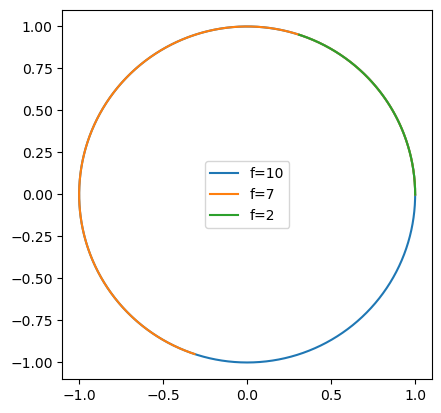

In [3]:
def complex_e(t, freq):
    # TODO
    x=math.cos(2*math.pi*freq*t)                                        # Formula for x
    y=math.sin(2*math.pi*freq*t)                                        # Formula for y

    return x,y

plot_fun(complex_e, 10, label="f=10", start=0, stop=0.1, steps=1000)
plot_fun(complex_e, 7, label="f=7", start=0, stop=0.1, steps=1000)
plot_fun(complex_e, 2, label="f=2", start=0, stop=0.1, steps=1000)

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  # Ensure x- and y-axis are same scaling
plt.show()

<p style="page-break-after:always;"></p>

## Wrapping a function around the circle

Next we want to wrap a function around this circle. For that we use a periodic function $g(t) = cos(2\pi f_{signal} t)$.

<br>
<div style="background-color: #042c58; color: #ffffff; width: 100%; padding: 0.3em; font-size:1.1em; font-weight: bold;">Wrap Function around Circle</div>
<div style="background-color: #d7e9fd; width: 100%; padding-top: 0.5em; padding-bottom: 0.3em">
    
Scale the vector of the circle point with the value of the function.
    
$$g'(t) = g(t) \cdot e^{2\pi f t i}$$
    
</div>

For each $t$ you compute $g(t) \cdot f(t)$, where f(t) is the circle using eulers number.

**TASK**:
1. Implementing a function that wraps  $g(t)$ around a circle using $f(t)$. Use $f_{signal} = 20$.
2. Sample and visualize for $t \in [0.001, 0.100]$ using:
    1. $f=30$
    2. $f=20$
    3. $f=10$

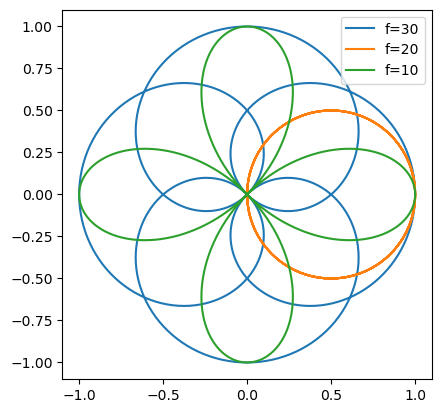

In [4]:
def g(t):
    # TODO
    g=math.cos(2*math.pi*20*t)                                                  # Formula for g(t)
    return g

def wrap_circle(t, fun, freq):
    # TODO

    x=math.cos(2*math.pi*freq*t)*fun(t)                                         # formula for x
    y=math.sin(2*math.pi*freq*t)*fun(t)                                         # Formula for y

    return x,y

plot_fun(wrap_circle, g, 30, label="f=30", start=0, stop=0.1, steps=1000)
plot_fun(wrap_circle, g, 20, label="f=20", start=0, stop=0.1, steps=1000)
plot_fun(wrap_circle, g, 10, label="f=10", start=0, stop=0.1, steps=1000)

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  # Ensure x- and y-axis are same scaling
plt.show()

Now implementing a more complex function $h(t)$ that consists of two cosines added: $h(t) = \cos(2\pi f_{1} t) + \cos(2\pi f_{2} t)$.

1. Visualize as above but use:
    1. $f_1 = 20$
    2. $f_2 = 45$


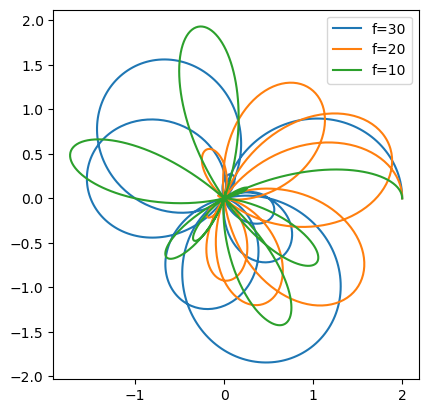

In [5]:
def h(t):
    # TODO
    
    h=math.cos(2*math.pi*20*t)+math.cos(2*math.pi*45*t)                                 # Formula for h(t)

    return h

plot_fun(wrap_circle, h, 30, label="f=30", start=0, stop=0.1, steps=1000)
plot_fun(wrap_circle, h, 20, label="f=20", start=0, stop=0.1, steps=1000)
plot_fun(wrap_circle, h, 10, label="f=10", start=0, stop=0.1, steps=1000)

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  # Ensure x- and y-axis are same scaling
plt.show()

<p style="page-break-after:always;"></p>

## Integrating to get Center of Mass

Since the result was chaotic, let's integrate / sum all the points to get the center of mass.

$$F = \sum_t g(t) \cdot f(t)$$

**TASK**:
1. Compute the sum of all xs and ys.
2. Visualize how the center moves as we change $f$ (frequency of $f(t)$).
    1. Plot the position of the average $x,y$ for $f \in [0, 100]$ using the function $g$.
    2. Plot the position of the average $x,y$ for $f \in [0, 100]$ using the function $h$.

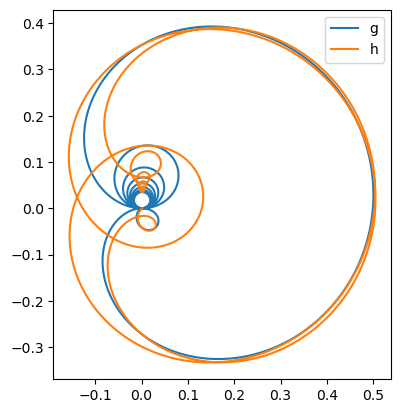

In [6]:
def average(freq, fun):
    # TODO
    xs=0
    ys=0
    step=0

    for i in xrange(0,0.1,1000):                                    # In order to get steps in float
        x,y=wrap_circle(i,fun,freq)                                 # Calling the wrap circle function previously defined
        xs=xs+x                                                     # Adding the x coordinate
        ys=ys+y                                                     # Adding the y coordinate
        step=step+1                                                 # Getting step value
    
    return xs/(step+1),ys/(step+1)                                  

plot_fun(average, g, label="g", start=0, stop=100, steps=1000)
plot_fun(average, h, label="h", start=0, stop=100, steps=1000)

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  # Ensure x- and y-axis are same scaling
plt.show()

1. Computing the l2 norm of the average point.
2. Ploting the l2 norm (on the y axis) for each frequency (on the x axis).

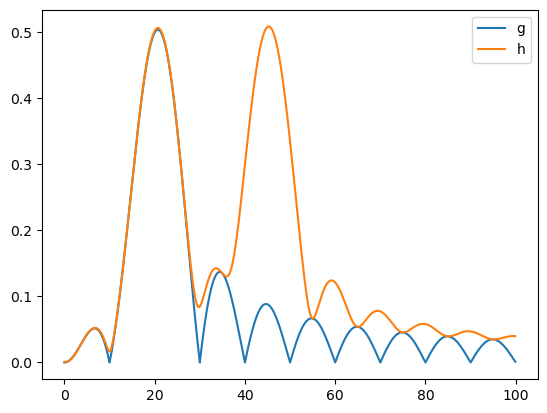

In [7]:
def almost_fourier(freq, fun, N=0.1, steps=1000):
    # TODO
    x,y=average(freq,fun)                                               # Calling average function
    l2=math.sqrt(x**2+y**2)                                             # Normalizing the x and y
    return freq, l2

plot_fun(almost_fourier, g, label="g", start=0, stop=100, steps=1000)
plot_fun(almost_fourier, h, label="h", start=0, stop=100, steps=1000)

plt.legend()
plt.show()

We see the peaks at the frequencies that are part of the signal.
* h: 20 and 45
* g: 20

<p style="page-break-after:always;"></p>

## Fourier

<BR>
<div style="background-color: #042c58; color: #ffffff; width: 100%; padding: 0.3em; font-size:1.1em; font-weight: bold;">Fourier Transform</div>
<div style="background-color: #d7e9fd; width: 100%; padding-top: 0.5em; padding-bottom: 0.3em">

1. Wrap $g(t)$ around a circle with frequency $f$.
2. Compute center of mass ($\approx$ integrate).
    
$$F(f) = \int g(t) e^{-2\pi f t i} dt$$
    
3. Amplitude/Magnitude (L2 Norm) = How much of a frequency is in the signal), Phase = Spatial information.

</div>
    